## LPIPS evaluator

In [1]:
from PIL import Image
import torch
from lpips import LPIPS
import os
from torchvision import transforms

In [2]:
# Load the pre-trained LPIPS model
lpips_model = LPIPS(net='vgg')
scores_cnn = {}
# Specify the paths to the two folders containing the images
folder1 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/in/'  # Replace with the path to your first folder
folder2 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/out_cnn/'  # Replace with the path to your second folder

# Iterate through the images in the folders
for filename in os.listdir(folder1):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Load the images from the two folders
        image1_path = os.path.join(folder1, filename)
        image2_path = os.path.join(folder2, filename)
        image1 = Image.open(image1_path)
        image2 = Image.open(image2_path)

        # Convert PIL images to PyTorch tensors
        image1_tensor = transforms.ToTensor()(image1)
        image2_tensor = transforms.ToTensor()(image2)

        # Compute the LPIPS similarity score
        lpips_score = lpips_model(image1_tensor, image2_tensor)
        scores_cnn[filename] = lpips_score
        # Print the LPIPS similarity score for the current pair of images
        print(f'LPIPS similarity score for {filename}: {lpips_score.item()}')


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/anaconda3/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
LPIPS similarity score for 015.jpg: 0.21473148465156555
LPIPS similarity score for 010.jpg: 0.33345696330070496
LPIPS similarity score for 011.jpg: 0.19953486323356628
LPIPS similarity score for 013.jpg: 0.30204319953918457
LPIPS similarity score for 006.jpg: 0.20248515903949738
LPIPS similarity score for 012.jpg: 0.19049637019634247
LPIPS similarity score for 077.jpg: 0.15362891554832458
LPIPS similarity score for 022.jpg: 0.2824576199054718
LPIPS similarity score for 035.jpg: 0.22773966193199158
LPIPS similarity score for 009.jpg: 0.21036416292190552


In [3]:
# Load the pre-trained LPIPS model
lpips_model = LPIPS(net='vgg')
scores_coltran = {}
# Specify the paths to the two folders containing the images
folder1 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/in/'  # Replace with the path to your first folder
folder2 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/out_coltran/'  # Replace with the path to your second folder

# Iterate through the images in the folders
for filename in os.listdir(folder1):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Load the images from the two folders
        image1_path = os.path.join(folder1, filename)
        image2_path = os.path.join(folder2, filename)
        image1 = Image.open(image1_path)
        image2 = Image.open(image2_path)
        image1 = image1.convert('RGB')
        image2 = image2.convert('RGB')
        image1 = image1.resize([224,224])
        image2 = image2.resize([224,224])
        # Convert PIL images to PyTorch tensors
        image1_tensor = transforms.ToTensor()(image1)
        image2_tensor = transforms.ToTensor()(image2)
        # Compute the LPIPS similarity score
        lpips_score = lpips_model(image1_tensor, image2_tensor)
        scores_coltran[filename] = lpips_score
        # Print the LPIPS similarity score for the current pair of images
        print(f'LPIPS similarity score for {filename}: {lpips_score.item()}')


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /opt/anaconda3/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
LPIPS similarity score for 015.jpg: 0.30298444628715515
LPIPS similarity score for 010.jpg: 0.39932486414909363
LPIPS similarity score for 011.jpg: 0.19932425022125244
LPIPS similarity score for 013.jpg: 0.47096702456474304
LPIPS similarity score for 006.jpg: 0.2952452003955841
LPIPS similarity score for 012.jpg: 0.23933234810829163
LPIPS similarity score for 077.jpg: 0.15291525423526764
LPIPS similarity score for 022.jpg: 0.16844573616981506
LPIPS similarity score for 035.jpg: 0.15530145168304443
LPIPS similarity score for 009.jpg: 0.15886403620243073


In [4]:
values = list(scores_coltran.values())

# Compute the sum of the values
total = sum(values)

# Compute the mean
mean = total / len(values)

print("Mean of dictionary values:", mean)

Mean of dictionary values: tensor([[[[0.2543]]]], grad_fn=<DivBackward0>)


In [5]:
values = list(scores_cnn.values())

# Compute the sum of the values
total = sum(values)

# Compute the mean
mean = total / len(values)

print("Mean of dictionary values:", mean)

Mean of dictionary values: tensor([[[[0.2317]]]], grad_fn=<DivBackward0>)


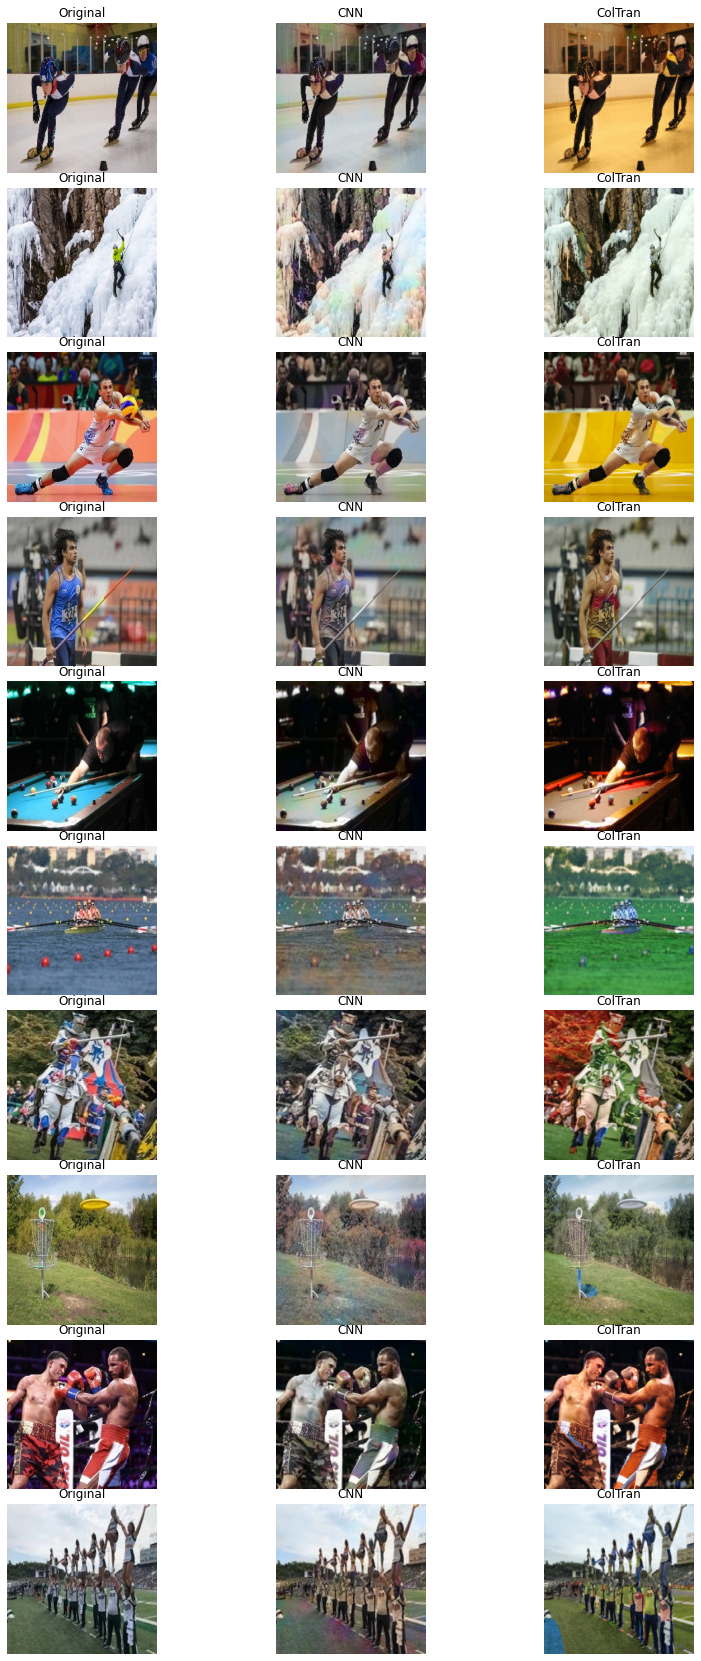

In [7]:
import matplotlib.pyplot as plt
import os

# Define the folder paths
folder1 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/in/'
folder2 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/out_cnn/'
folder3 = '/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/out_coltran/'

# Define the image file names (assuming the same names in all folders)
image_names = ['006.jpg','009.jpg','010.jpg','011.jpg','012.jpg','013.jpg','015.jpg','022.jpg','035.jpg','077.jpg']

# Create a 10x3 subplot grid
fig, axes = plt.subplots(10, 3, figsize=(7*2, 15*2))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the image file names
for i, image_name in enumerate(image_names):
    # Load images from each folder
    image1 = plt.imread(os.path.join(folder1, image_name))
    image2 = plt.imread(os.path.join(folder2, image_name))
    image3 = plt.imread(os.path.join(folder3, image_name))
    
    # Plot images on the subplots
    ax1 = axes[i*3]
    ax1.imshow(image1, cmap='gray')
    ax1.axis('off')  # Turn off axis ticks and labels
    ax1.set_title('Original')
    
    ax2 = axes[i*3 + 1]
    ax2.imshow(image2, cmap='gray')
    ax2.axis('off')
    ax2.set_title('CNN')
    
    ax3 = axes[i*3 + 2]
    ax3.imshow(image3, cmap='gray')
    ax3.axis('off')
    ax3.set_title('ColTran')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save the plot as an image file
plt.savefig('grid_of_images.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


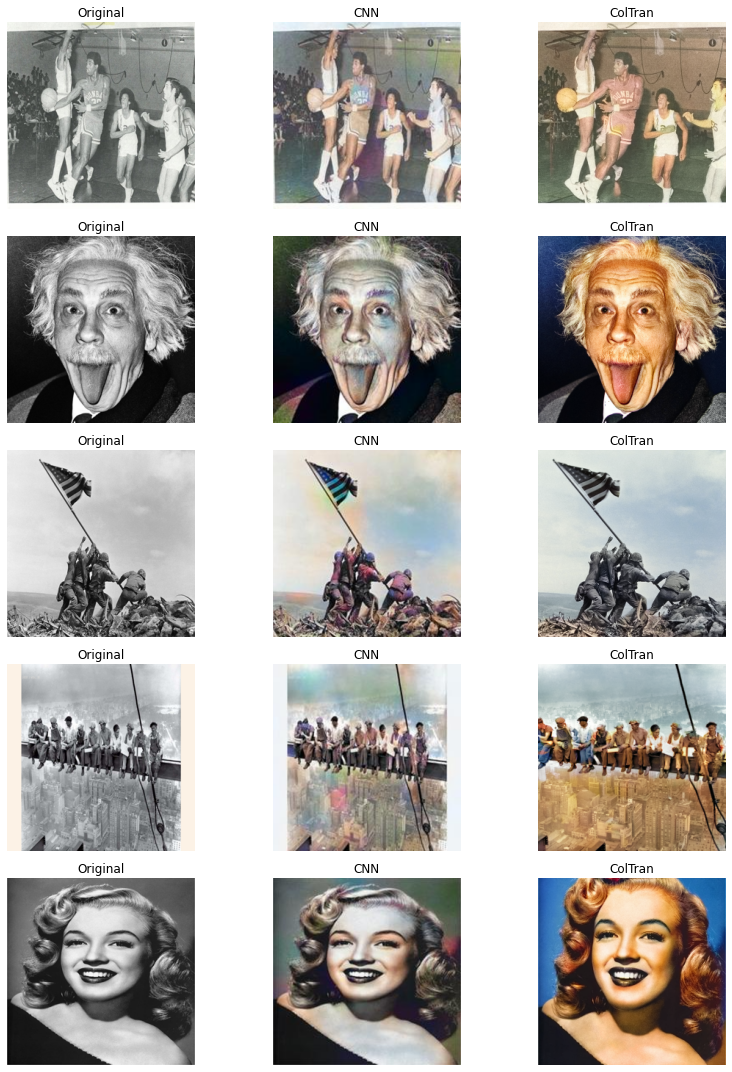

In [18]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory paths for the three columns
original_dir = "/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/bw-photos-in/"
cnn_dir = "/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/bw-out-cnn/"
coltran_dir = "/Users/dakotawilson/Desktop/image-colorizer-2/evaluated-photos/bw-out-coltran"

# Get list of image filenames in each directory
original_files = [f for f in os.listdir(original_dir) if f.endswith(".jpg") or f.endswith(".jpeg")]
cnn_files = [f for f in os.listdir(cnn_dir) if f.endswith(".jpg") or f.endswith(".jpeg")]
coltran_files = [f for f in os.listdir(coltran_dir) if f.endswith(".jpg") or f.endswith(".jpeg")]

# Sort the filenames
original_files.sort()
cnn_files.sort()
coltran_files.sort()

# Create a figure with 3 columns and 5 rows
fig, axes = plt.subplots(5, 3, figsize=(12, 15))

# Iterate through each row
for i in range(5):
    # Load and resize original image to 256 x 256 in column 1
    original_img = Image.open(os.path.join(original_dir, original_files[i]))
    original_img = original_img.resize((256, 256))
    axes[i, 0].imshow(original_img)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")

    # Load and resize CNN image to 256 x 256 in column 2
    cnn_img = Image.open(os.path.join(cnn_dir, cnn_files[i]))
    cnn_img = cnn_img.resize((256, 256))
    axes[i, 1].imshow(cnn_img)
    axes[i, 1].set_title("CNN")
    axes[i, 1].axis("off")

    # Load and resize ColTran image to 256 x 256 in column 3
    coltran_img = Image.open(os.path.join(coltran_dir, coltran_files[i]))
    coltran_img = coltran_img.resize((256, 256))
    axes[i, 2].imshow(coltran_img)
    axes[i, 2].set_title("ColTran")
    axes[i, 2].axis("off")

plt.tight_layout()

plt.savefig('bw-output.png')
plt.show()